In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def hypothesis(w, x):
    return 1 / (1 + np.exp(-(w.transpose().dot(x)[0][0])))

In [3]:
# Funkcija gubitka u slucaju reprezentacije klasa brojevima 1 i -1
# Napomena: ova funkcija NIJE identicna Endrjuevoj funkciji koja racuna gubitak
# iskljucivo za y=0, y=1 !!!
def loss_singular_janicic(x, y, w):
    return np.log(1 + np.exp(-y * w.transpose().dot(x)[0][0]))

In [28]:
def loss_singular(x, y, w):
    h_x = hypothesis(w, x)
    
    return -y*np.log(h_x) - (1 - y)*np.log(1 - h_x)

In [5]:
def loss_function(X, y, w):
    n = y.shape[0]
    y_predict = np.array(list(map(lambda x: 
                                  hypothesis(w, x.reshape(-1, 1)), X))).reshape(-1, 1)
    diff = y_predict - y
    
    gradient = np.zeros((w.shape[0]))
    gradient = 1/n *  (X.transpose().dot(diff))
    
    loss = 0
    for i in range(n):
        x_i = X[i, :].reshape(-1, 1)
        y_i = y[i][0]
        
        loss += loss_singular(x_i, y_i, w)  
    
    loss /= n
    
    return loss, gradient

In [6]:
def gradient_descent(X, y, w, alpha=0.01, num_iter=500, eps=10e-3):
    loss_history = np.zeros((num_iter, 1))
    it_break = num_iter
    
    for i in range(num_iter):
        loss, gradient = loss_function(X, y, w)
        w = w - alpha*gradient
        
        loss_history[i] = loss
        # print(f'Iteration {i+1}: Loss = {loss}')
        
        if i > 0 and np.abs(loss - loss_history[i-1]) <= eps:
            it_break = i
            break
    
    return w, loss_history, it_break

In [7]:
def show_model(w):
    print(f'w = {w[0][0]} + {w[1][0]}*x1 + {w[2][0]}*x2')
    print(f'f_w = 1 / (1 + exp(-({round(w[0][0], 3)} + {round(w[1][0], 3)}*petal.length'
          f'+ {round(w[2][0], 3)}*petal.width))')

In [8]:
df = pd.read_csv('../datasets/iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [9]:
df = df.loc[df['variety'] != 'Setosa']
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
50,7.0,3.2,4.7,1.4,Versicolor
51,6.4,3.2,4.5,1.5,Versicolor
52,6.9,3.1,4.9,1.5,Versicolor
53,5.5,2.3,4.0,1.3,Versicolor
54,6.5,2.8,4.6,1.5,Versicolor


In [10]:
n = df.shape[0]
print(f'Broj instanci: {n}')

Broj instanci: 100


In [11]:
attr1 = 'petal.length'
attr2 = 'petal.width'
m = 2

X = np.ones((n, m + 1))
X[:, 1] = df[attr1]
X[:, 2] = df[attr2]

print(X)

[[1.  4.7 1.4]
 [1.  4.5 1.5]
 [1.  4.9 1.5]
 [1.  4.  1.3]
 [1.  4.6 1.5]
 [1.  4.5 1.3]
 [1.  4.7 1.6]
 [1.  3.3 1. ]
 [1.  4.6 1.3]
 [1.  3.9 1.4]
 [1.  3.5 1. ]
 [1.  4.2 1.5]
 [1.  4.  1. ]
 [1.  4.7 1.4]
 [1.  3.6 1.3]
 [1.  4.4 1.4]
 [1.  4.5 1.5]
 [1.  4.1 1. ]
 [1.  4.5 1.5]
 [1.  3.9 1.1]
 [1.  4.8 1.8]
 [1.  4.  1.3]
 [1.  4.9 1.5]
 [1.  4.7 1.2]
 [1.  4.3 1.3]
 [1.  4.4 1.4]
 [1.  4.8 1.4]
 [1.  5.  1.7]
 [1.  4.5 1.5]
 [1.  3.5 1. ]
 [1.  3.8 1.1]
 [1.  3.7 1. ]
 [1.  3.9 1.2]
 [1.  5.1 1.6]
 [1.  4.5 1.5]
 [1.  4.5 1.6]
 [1.  4.7 1.5]
 [1.  4.4 1.3]
 [1.  4.1 1.3]
 [1.  4.  1.3]
 [1.  4.4 1.2]
 [1.  4.6 1.4]
 [1.  4.  1.2]
 [1.  3.3 1. ]
 [1.  4.2 1.3]
 [1.  4.2 1.2]
 [1.  4.2 1.3]
 [1.  4.3 1.3]
 [1.  3.  1.1]
 [1.  4.1 1.3]
 [1.  6.  2.5]
 [1.  5.1 1.9]
 [1.  5.9 2.1]
 [1.  5.6 1.8]
 [1.  5.8 2.2]
 [1.  6.6 2.1]
 [1.  4.5 1.7]
 [1.  6.3 1.8]
 [1.  5.8 1.8]
 [1.  6.1 2.5]
 [1.  5.1 2. ]
 [1.  5.3 1.9]
 [1.  5.5 2.1]
 [1.  5.  2. ]
 [1.  5.1 2.4]
 [1.  5.3 2.3]
 [1.  5.5 

In [12]:
y = df['variety']
y.head()

50    Versicolor
51    Versicolor
52    Versicolor
53    Versicolor
54    Versicolor
Name: variety, dtype: object

In [13]:
variety = df['variety'].unique()
n_classes = len(variety)

print(f'Broj klasa: {n_classes}')

Broj klasa: 2


In [14]:
mapping_name_to_i = dict(zip(variety, range(n_classes)))
mapping_i_to_name = dict(zip(range(n_classes), variety))

print('Preslikavanje imena klase u broj:')
for (k, v) in mapping_name_to_i.items():
    print(f'{k} -> {v}')
print()
    
print('Preslikavanje broja u ime klase:')
for (k, v) in mapping_i_to_name.items():
    print(f'{k} -> {v}')
print()
    
y = y.replace(mapping_name_to_i)

print('Klase nakon mapiranja:')
y.head()

Preslikavanje imena klase u broj:
Versicolor -> 0
Virginica -> 1

Preslikavanje broja u ime klase:
0 -> Versicolor
1 -> Virginica

Klase nakon mapiranja:


50    0
51    0
52    0
53    0
54    0
Name: variety, dtype: int64

In [15]:
y = np.array(y).reshape(-1, 1)
print(y)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


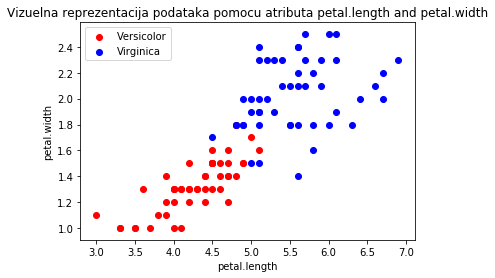

In [16]:
colors = ['red', 'blue']

for (v, c) in zip(variety, colors):
    subsamples = df.loc[df['variety'] == v]
    plt.scatter(subsamples[attr1], subsamples[attr2], color=c)
    
plt.title(f'Vizuelna reprezentacija podataka pomocu atributa {attr1} and {attr2}')
plt.legend(list(variety))

plt.xlabel(attr1)
plt.ylabel(attr2)

plt.show()

In [17]:
print(f'Model form: f_w(x) = 1 / (1 + exp(-(w0 + w1*petal.length + w2*petal.width)))')

Model form: f_w(x) = 1 / (1 + exp(-(w0 + w1*petal.length + w2*petal.width)))


In [18]:
w_init = np.zeros((m + 1, 1))
print('w_init:')
print(w_init)

w_init:
[[0.]
 [0.]
 [0.]]


In [19]:
alpha = 0.1
num_iter = 10000
eps = 10e-5

w, loss_history, it_break = gradient_descent(X, y, w_init, alpha, num_iter, eps)

In [20]:
print(f'Loss = {loss_history[-1][0]}')
print(f'Precision = {round(100 - loss_history[-1][0], 3)}%')

Loss = 0.0
Precision = 100.0%


In [21]:
print('Trained model:')
show_model(w)

Trained model:
w = -5.071642865182238 + -0.12101564484084681*x1 + 3.5044507224383614*x2
f_w = 1 / (1 + exp(-(-5.072 + -0.121*petal.length+ 3.504*petal.width))


Text(0.5, 1.0, 'Funkcija gubitka u zavisnosti od broja iteracija')

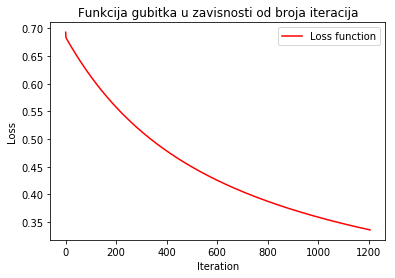

In [22]:
plt.plot(range(it_break), loss_history[:it_break], color='red')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.legend(['Loss function'])
plt.title('Funkcija gubitka u zavisnosti od broja iteracija')

In [26]:
# Provera uspesnosti istrenirnaog modela
petal_length = float(input('Unesite petal.length: '))
petal_width = float(input('Unesite petal.width: '))

In [27]:
x = np.array([1, petal_length, petal_width]).reshape(-1, 1)
f_w = hypothesis(w, x)

if f_w >= 0.5:
    cls = 1
    prob = round(100*f_w, 3)
else:
    cls = 0
    prob = round(100*(1 - f_w), 3)

print(f'f_w = {f_w}', end='')
print(f'(Probability: {prob}%)')
    
print(f'Vrsta cveta: {mapping_i_to_name[cls]}')

f_w = 0.4826070372397184(Probability: 51.739%)
Vrsta cveta: Versicolor
